本の中で引用されているPython用コードを載せています．
本サイトの内容は，随時修正いたします．

本サイトのソースコードは自由に使用，改変，配布することが可能です．

# 速度論

## [K1] ミカエリス-メンテンモデル

3.2節参照．

KM =  5.1


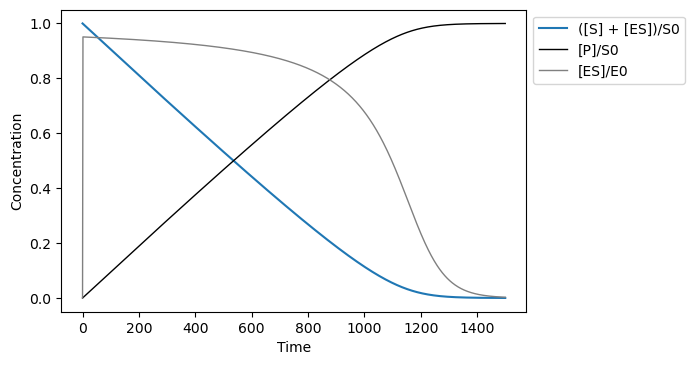

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

def mm(var, t, kon, koff, k):  # ミカエリス-メンテンモデル
    S, ES, P = var
    E = E0 - ES
    dSdt = -kon*E*S + koff*ES
    dESdt = kon*E*S - koff*ES - k*ES
    dPdt =  k*ES

    return [dSdt, dESdt, dPdt]

kon, koff, k = 1, 5, 0.1  # 書籍では kon, koffは k+, k- に対応します．
S0, E0 =100, 1  # 全濃度

t = np.linspace(0, 1500, 1000)
init = [S0, 0, 0] # 初期値
r = odeint(mm, init, t, args = (kon, koff, k)) # 微分方程式を解く

print("KM = ", (koff + k)/kon)  # ミカエリス定数

plt.figure(figsize = (6,4), dpi = 100)

plt.plot(t, (r[:,0]+r[:,1]) / S0, label = '([S] + [ES])/S0')
plt.plot(t, r[:,2] / S0, label = '[P]/S0', linewidth = 1, color = 'black')
plt.plot(t, r[:,1] / E0, label = '[ES]/E0', linewidth = 1, color = 'gray')
plt.legend(bbox_to_anchor=(1, 1))

plt.ylabel('Concentration')
plt.xlabel('Time')

plt.show()

## [K2] ヘモグロビン

ポーリングモデル．横軸は酸素分圧です．

3.6節参照．

n(fit) =  1.0 , kd(fit) =  0.3678794411714423
n(fit) =  1.9500137032893272 , kd(fit) =  0.081880980705429
n(fit) =  3.193393743260293 , kd(fit) =  0.01831563741960137


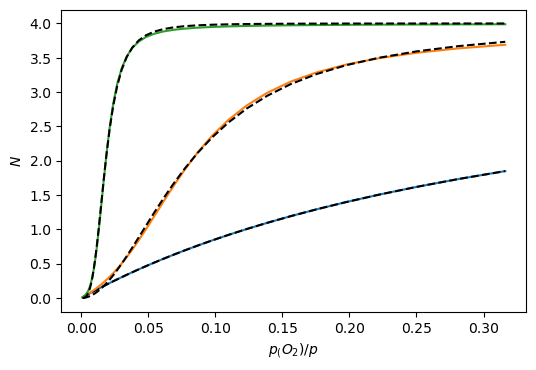

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def f(epsilon, mu, J):    # ポーリングモデル
    X = np.exp(-epsilon + mu)
    Y = np.exp(-J)
    
    Z = 1 + 4*X + 6*X*X*Y + 4*X*X*X*Y*Y*Y + X*X*X*X*Y*Y*Y*Y*Y*Y
    N = (4*X + 12*X*X*Y + 12*X*X*X*Y*Y*Y + 4*X*X*X*X*Y*Y*Y*Y*Y*Y)/Z
    
    return N

def hill(x, n, kd):    # ヒル関数（フィッティング用）
    return 4/(1+np.power(kd, n)/np.power(x, n))

epsilon = -1

p = np.logspace(-3, -0.5, base = 10)  # 酸素分圧
mu = np.log(p)

plt.figure(figsize=(6, 4) ,dpi = 100)

for J in [0, -1, -2]:
    N = f(epsilon, mu, J)
    (n_fit, kd_fit), cov = curve_fit(hill, p, N, p0 = [2, 0.01]) # ヒルの式によるフィット
    fit = hill(p, n_fit, kd_fit)
    
    plt.plot(p, N)
    plt.plot(p, fit, color = 'black', linestyle = 'dashed')
    print('n(fit) = ', n_fit, ', kd(fit) = ', kd_fit)
    
plt.ylabel(r'$N$')
plt.xlabel(r'$p_(O_2) / p$')

plt.show()

# 力学系

## [D1] 固定点

4.1節参照．

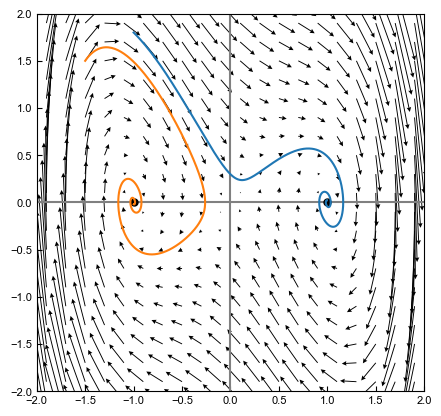

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def func(var, t):
    x = var[0]
    y = var[1]
    dxdt = y
    dydt = -(-2*x+2*x*x*x)-y
    
    return [dxdt, dydt]
    
plt.figure(figsize = (5, 5), dpi = 100)

xmin, xmax, ymin, ymax = -2.5, 2.5, -2.5, 2.5

# 軸をプロット
plt.plot([xmin, xmax], [0, 0], color = 'gray')
plt.plot([0, 0], [ymin,ymax], color = 'gray')

# 安定固定点をプロット
plt.plot(1,0,'o',color='black', markersize = 5)
plt.plot(-1,0,'o',color='black', markersize = 5)

# ベクトル場をプロット
gridwidth=0.2 # メッシュの間隔
X, Y = np.meshgrid(np.arange(xmin, xmax, gridwidth), np.arange(ymin, ymax, gridwidth))  # メッシュを刻む
U, V = func([X, Y], t) # 計算. tはダミー

plt.quiver(X, Y, U, V, scale = 45, headwidth = 5) # プロット．scaleの値が小さいほど矢印が長くなる．

# 時間発展させて，軌跡をプロット．
t = np.linspace(0.0, 10.0, 1000) # 時間
            
init = [-1, 1.8] # 初期値
result = odeint(func, init, t, args=()) # 微分方程式を解く
plt.plot(result[:,0], result[:,1], '-')

init = [-1.5, 1.5]
result = odeint(func, init, t, args=())
plt.plot(result[:,0], result[:,1], '-')

plt.xlim([-2, 2])
plt.ylim([-2, 2])
            
plt.show();

## [D2] ファンデルポール型振動子

4.3節参照．

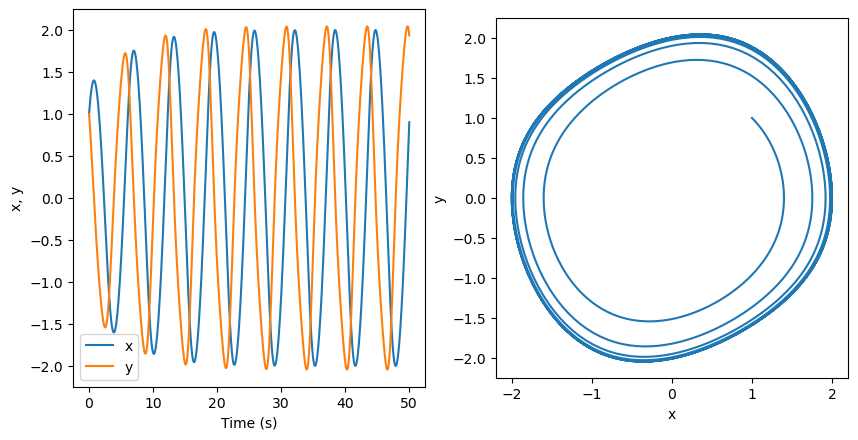

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def func(var, t):
    x, y = var
    dxdt = y
    dydt = -mu*(x*x-1)*y - x
    
    return [dxdt, dydt]

fig = plt.figure(figsize=(10,5), dpi=100)

init = [1, 1]
N = 1000
t = np.linspace(0, 50, N)

mu = 0.2
r = odeint(func, init, t, args = ())

ax1 = fig.add_subplot(121, xlabel = 'Time (s)', ylabel = 'x, y')
ax1.plot(t, r[:,0], label = 'x')
ax1.plot(t, r[:,1], label = 'y')
ax1.legend()

ax2 = fig.add_subplot(122, xlabel = 'x', ylabel = 'y', aspect = 'equal')
ax2.plot(r[:,0], r[:, 1])

plt.show()

## [D3] チューリングパターン

4.6節参照．

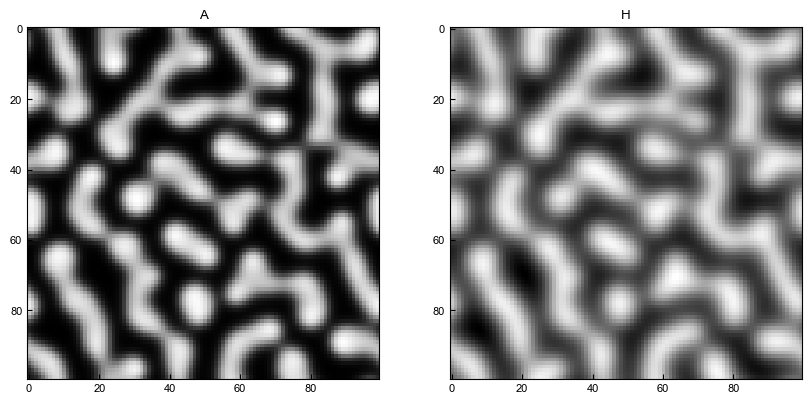

In [224]:
import matplotlib.pyplot as plt
import numpy as np

# 拡散項の計算
def diffusion(f, dx):
    return (-4 * f + np.roll(f,1,axis=0) + np.roll(f,-1,axis=0)+ np.roll(f,+1,axis=1) + np.roll(f,-1,axis=1)) / (dx*dx)

Da, Dh, ka, kh, d = 0.1, 5, 0.2, 0.4, 0.5

L = 100
dx, dt = 0.5, 0.01

# 初期値
a = 0.1*np.random.normal(size=(L, L))
h = 0.1*np.random.normal(size=(L, L))

# 時間発展
for i in range(5000):            
    da = dt * (ka*a*a/(1+a*a)/h-d*a + Da*diffusion(a, dx))
    dh = dt * (kh*a*a/(1+a*a)-d*h + Dh*diffusion(h, dx))
        
    a += da
    h += dh

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5), dpi = 100)
    
ax1.imshow(a, cmap='gray')
ax2.imshow(h, cmap='gray')
        
ax1.grid(b = False)
ax2.grid(b = False)
        
ax1.set_title("A")
ax2.set_title("H")

plt.show()

# 熱揺らぎと拡散

## [F1] ランダムウォーク

自由空間でのランダムウォークと，そのMSDプロット．

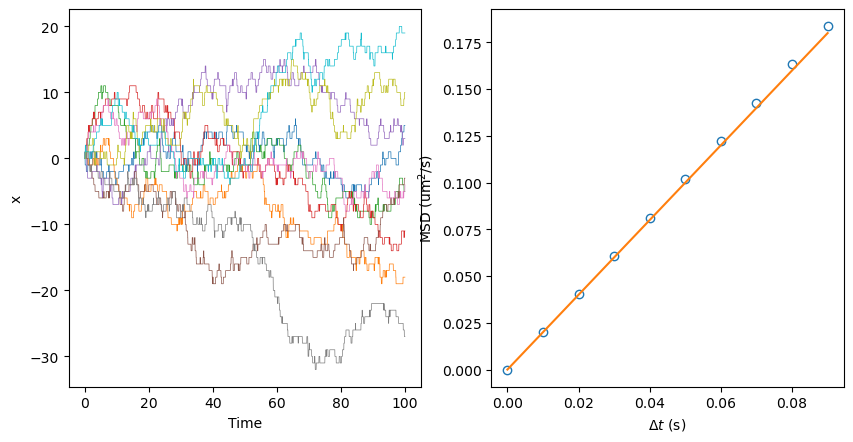

In [7]:
import numpy as np # 計算用ライブラリ
import matplotlib.pyplot as plt  # プロット用ライブラリ
    

# ランダムウォーク．p: １ステップあたりの確率．N: ステップの数．
def randomwalk(tau, w, d, N):     
    r = np.random.rand(N)
       
    x = np.zeros(N)
    x[0] = 0 # 初期位置
    p = w*tau
    for i in range(N-1): # ここはリストのまま計算すればかなり高速化できますが，分かりやすくするため，逐次的に計算しています．
        if r[i]<p:
            x[i + 1] = x[i]  + d
        elif r[i]<2*p:
            x[i + 1] = x[i]  - d  
        else:
            x[i + 1] = x[i]
    t = np.linspace(0, (N-1)*tau, N)
    
    return t, x

# 時系列 x[] のMSDを計算する（点の数 = msdN）．
def MSD(x, msdN):
    msd = np.zeros(msdN)
    n = len(x)  # 点の数
    for m in range(0, msdN):   
        dx = (x[m:n:1] - x[0:n-m:1])**2  # m*dt だけ離れた2点間の差の2乗を足していく．
        msd[m] += dx.sum() / len(dx)
    return msd


fig = plt.figure(figsize=(10,5), dpi=100)

ax1 = fig.add_subplot(121, xlabel = 'Time', ylabel = 'x')

# 同じ計算を10回して重ねてプロット．まとめて，MSDを計算．
tau = 0.01 # サイコロを振る時間間隔
d = 1 # 1歩で進む距離
w = 1 # 単位時間当たりの遷移率
N = 10000 # ステップ数
msdN = 10 # MSDを計算する点の数
msd = np.zeros(msdN)
for i in range(10):
    t, x = randomwalk(tau, w, d, N) 
    ax1.plot(t, x, lw = 0.5)  # lwは線の太さ．
    
    msd += MSD(x, msdN)  # MSDの計算
msd /= 10

# MSDのプロット
dt = np.linspace(0, (msdN-1)*tau, msdN)
D = w*d*d  # 拡散係数
theory = 2*D*dt   # 理論曲線   MSD = 2DΔt

ax2 = fig.add_subplot(122, xlabel = r'$\Delta t$ (s)', ylabel = r'MSD (um$^2$/s)')
ax2.plot(dt, msd, 'o', markerfacecolor='none')
ax2.plot(dt, theory) 

plt.show()

## [F2] 自己相関関数

5.8節参照．

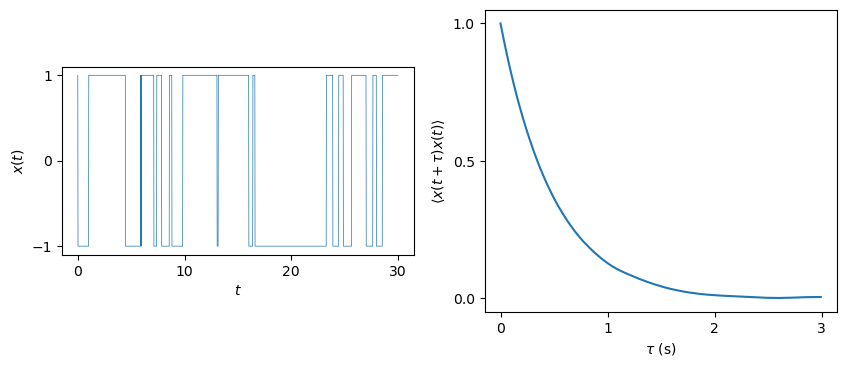

In [337]:
import numpy as np # 計算用ライブラリ
import matplotlib.pyplot as plt  # プロット用ライブラリ
    

# ランダムウォーク．p: １ステップあたりの確率．N: ステップの数．
def randomwalk(tau, w, d, N):  # 1, -1の間をランダムに行き来する．   
    r = np.random.rand(N)
       
    x = np.zeros(N)
    x[0] = 1 # 初期位置
    p = w*tau
    for i in range(N-1):
        if r[i]<p:
            x[i + 1] = -x[i]
        else:
            x[i + 1] = x[i]
    t = np.linspace(0, (N-1)*tau, N)
    
    return t, x

# 時系列 x[] の自己相関関数を計算する（点の数 = M）．
def Corr(x, M):
    c = np.zeros(M)
    n = len(x)  # 点の数
    for m in range(0, M):   
        d = x[m:n-1] * x[0:n-m-1]  
        c[m] = d.sum() / len(d)
    return c


fig = plt.figure(figsize=(10,4), dpi=100)

# 同じ計算を10回して重ねてプロット．まとめて，MSDを計算．
tau = 0.01 # サイコロを振る時間間隔
d = 1 # 1歩で進む距離
w = 1 # 単位時間当たりの遷移率
N = 1000000 # ステップ数
M = 300 # 自己相関関数を計算する点の数
    
t, x = randomwalk(tau, w, d, N) 

plotN = 3000 # プロットするの点の数
ax1 = fig.add_subplot(121, xlabel = r'$t$', ylabel = r'$x(t)$')
ax1.plot(t[:plotN], x[:plotN], lw = 0.5)  # lwは線の太さ．
ax1.set_xticks([0, 10, 20, 30])
ax1.set_yticks([-1, 0, 1])
ax1.set_aspect(8)

dt = np.linspace(0, (M-1)*tau, M)
C = Corr(x, M)  # 自己相関関数の計算

ax2 = fig.add_subplot(122, xlabel = r'$\tau$ (s)', ylabel = r'$\langle x(t+\tau)x(t)\rangle$')
ax2.plot(dt, C, '-', markerfacecolor='none')
ax2.set_xticks([0,1,2,3])
ax2.set_yticks([0,0.5,1])

plt.show()

## [F3] 拡散方程式

5.11節参照．

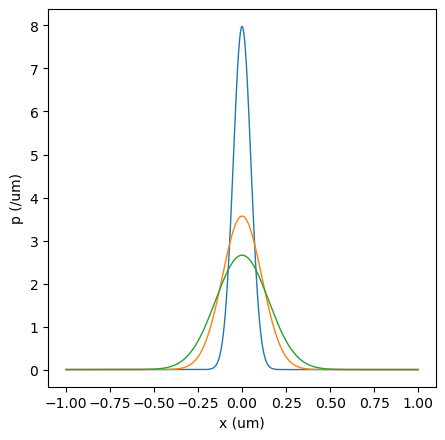

In [362]:
import numpy as np # 計算用ライブラリ
import matplotlib.pyplot as plt  # プロット用ライブラリ

# 拡散方程式を解く．周期境界．
def diffusionequation(dt, dx, T, L, D):  # 時間刻み dt で T だけ計算．慶のサイズは L, 空間の刻み幅 dx, 拡散係数 D．  
    n = int(T / dt)  # ステップ数
    nx = int(L/dx) # 空間の分割数
    
    # 初期分布．幅dの正規分布
    x = np.linspace(-L/2, L/2-dx, nx)
    d = 0.5E-7
    p = np.exp(-0.5*(x/d)**2)/np.sqrt(2*np.pi*d*d)
    
    # 拡散方程式に従って時間発展
    for i in range(n):
        diff = D*(np.roll(p, 1) - 2*p + np.roll(p,-1))/dx/dx  # 拡散項．np.roll(p, 1) はリストを1つずらす．
        p += diff*dt
    
    return x, p


# パラメータ設定
D = 1E-16 # 拡散係数 (m^2/s)
  
L = 2E-6
dx = L/1000
dt = 1E-2 # (s) 計算の時間刻み

plt.figure(figsize=(5,5), dpi=100)
for T in [0, 50, 100]: # 時間を変えて計算．
    x, p = diffusionequation(dt, dx, T, L, D)  # 拡散方程式による計算
    plt.plot(x*1E6, p*1E-6, lw = 1)  # lwは線の太さ．
        
plt.xlabel('x (um)')
plt.ylabel('p (/um)')

plt.show()

## [F4] 移流拡散方程式

5.6節参照．

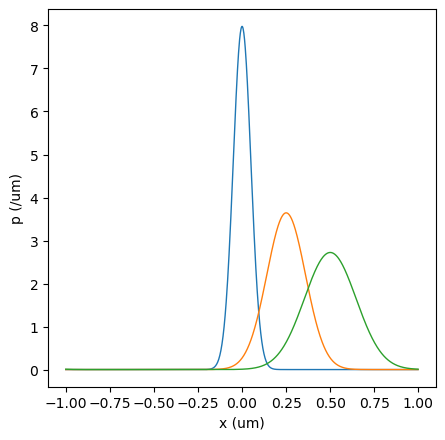

In [363]:
import numpy as np # 計算用ライブラリ
import matplotlib.pyplot as plt  # プロット用ライブラリ

# 移流拡散方程式を解く．周期境界．
def diffusionequation(dt, dx, T, L, D):  # 時間刻み dt で T だけ計算．慶のサイズは L, 空間の刻み幅 dx, 拡散係数 D．  
    n = int(T / dt)  # ステップ数
    nx = int(L/dx) # 空間の分割数
    
    # 初期分布．幅dの正規分布
    x = np.linspace(-L/2, L/2-dx, nx)
    d = 0.5E-7
    p = np.exp(-0.5*(x/d)**2)/np.sqrt(2*np.pi*d*d)
    
    # 拡散方程式に従って時間発展
    for i in range(n):
        conv = -u * (np.roll(p,-1) - p)/dx # 移流項
        diff = D*(np.roll(p, 1) - 2*p + np.roll(p,-1))/dx/dx  # 拡散項．np.roll(p, 1) はリストを1つずらす．
        p += (conv + diff)*dt
    
    return x, p


# パラメータ設定
D = 1E-16 # 拡散係数 (m^2/s)
u = 5E-9 # 速度 (m/s)
  
L = 2E-6
dx = L/1000
dt = 1E-2 # (s) 計算の時間刻み

plt.figure(figsize=(5,5), dpi=100)
for T in [0, 50, 100]: # 時間を変えて計算．
    x, p = diffusionequation(dt, dx, T, L, D)  # 拡散方程式による計算
    plt.plot(x*1E6, p*1E-6, lw = 1)  # lwは線の太さ．
        
plt.xlabel('x (um)')
plt.ylabel('p (/um)')

plt.show()

## [F5] ランジュバン方程式

ランジュバン方程式：
$$\gamma \dot x=-kx+\xi,\qquad \langle \xi(t)\xi(s)\rangle=2k_\mathrm{B}T\gamma\delta(t-s).$$
これを差分すると，
$$x_{n+1}-x_{n}=-\frac k\gamma x_n\Delta t+w r_n,\qquad w=\sqrt{\frac{2k_\mathrm{B}T}\gamma\Delta t}.$$
ただし，$r_n$は正規分布に従う乱数（平均0, 分散1）．
熱揺動力の項では，ルートの中に$\Delta t$が入ることに注意．

ばね定数 $k$, 摩擦係数 $\gamma$では，時定数 $\tau=\frac \gamma k$ で平衡状態に緩和する．また，このバネ＋摩擦の系はローパスフィルタ―とみなすこともでき，$\tau$ よりも短い時間スケールの運動はなまってしまう． 


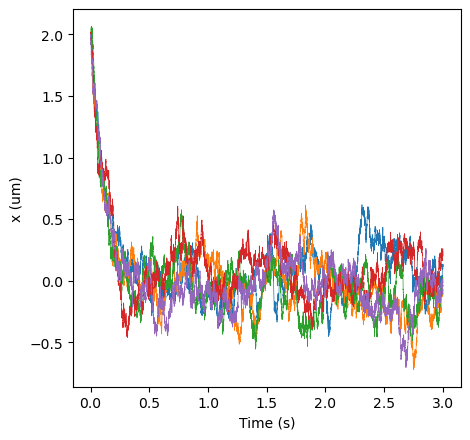

In [29]:
import numpy as np # 計算用ライブラリ
import matplotlib.pyplot as plt  # プロット用ライブラリ

kBT = 4.14E-21  # (J = kg m^2 / s^2)

# メインの関数．ランジュバン方程式をオイラー法で数値積分．
def langevin(dt, T, x0, k, gamma):  # 時間刻み dt で T だけ計算   
    n = int(T / dt)  # ステップ数
    
    w = np.sqrt(2*kBT*dt/gamma)  # ルートの中にdtを入れる
    r = np.random.standard_normal(size = n - 1) # n-1個の正規乱数（平均0, 分散1）を発生．
       
    x = np.zeros(n)
    x[0] = x0 # m/s, 初期位置
    for i in range(n-1):
        f = - k * x[i] # 調和ポテンシャルからうける力
        x[i + 1] = x[i] + dt * f / gamma + w * r[i]
        
    t = np.linspace(0, T - dt, n)
    return t, x


# パラメータ設定
gamma = 1E-8 # (kg/s)
tau = 0.1 # (s) トラップの時定数
k = gamma/tau   # トラップのばね定数
   
T = 3 # (s) 計算時間
dt = 1E-4 # (s) 計算の時間刻み
x0 = 2E-6 # (m) 初期位置．少し離れたところからスタートして，緩和の様子を見てみる．

# 同じ計算を5回して重ねてプロット．

plt.figure(figsize=(5,5), dpi=100)
for i in range(5):
    t, x = langevin(dt, T, x0, k, gamma)  # ランジュバン方程式による計算
    plt.plot(t, x *1E6, lw = 0.5)  # lwは線の太さ．
        
plt.xlabel('Time (s)')
plt.ylabel('x (um)')

plt.show()

# 構造

## [Q1] エントロピー弾性

長さ1の棒がN個つながった2次元状の高分子．棒同士のつなぎ目でランダムな方向を向く．144個の高分子を生成して並べてプロット．

6.4節参照．

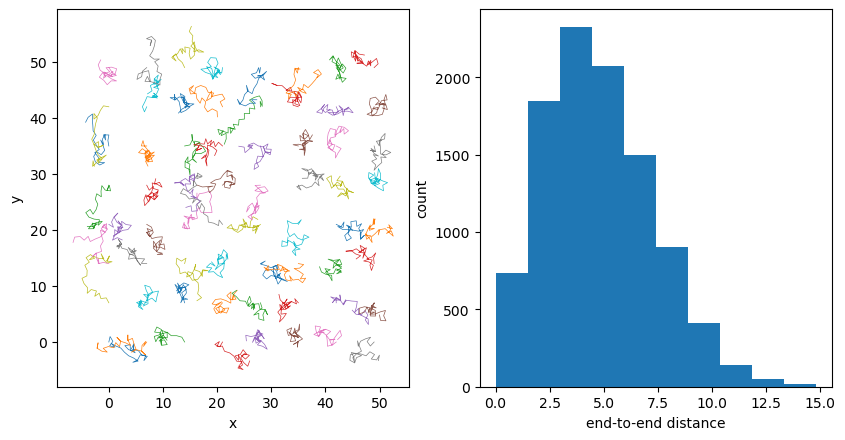

末端間距離の平均 =  4.776474330434544


In [336]:
import numpy as np # 計算用ライブラリ
import matplotlib.pyplot as plt  # プロット用ライブラリ
    

# ランダムウォーク．p: １ステップあたりの確率．N: ステップの数．
def polymer( N):     
    theta = np.random.rand(N)*2*np.pi
    
    x = np.zeros(N)
    y = np.zeros(N)
    for i in range(N-1):
        x[i+1] = x[i] + np.cos(theta[i])
        y[i+1] = y[i] + np.sin(theta[i])
    
    L = np.sqrt(x[N-1]*x[N-1]+y[N-1]*y[N-1]) # 末端間距離
    
    return x, y, L

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5), dpi = 100)

# 同じ計算を10回して重ねてプロット．まとめて，MSDを計算．
N = 30 # 高分子の長さ

d = 7 # プロットする間隔
for i in range(64):
    x, y, dummy = polymer(N) 
    ax1.plot(x + (i%8)*d, y + int(i/8)*d, lw = 0.5)  # lwは線の太さ．

ax1.set_xlabel('x')
ax1.set_ylabel('y')

L = np.zeros(10000)
for i in range(10000):
    x, y, L[i] = polymer(N) 
ax2.hist(L) # 末端館距離 L の分布

ax2.set_xlabel('end-to-end distance')
ax2.set_ylabel('count')

plt.show()

print('末端間距離の平均 = ', np.mean(L))

# 分子モーター

## [M1] フラッシングラチェット

8.9節参照．

- のこぎり型ポテンシャルとフラットなポテンシャルをperiodごとに周期的切り替える．
- ランジュバン方程式に従って粒子は運動．

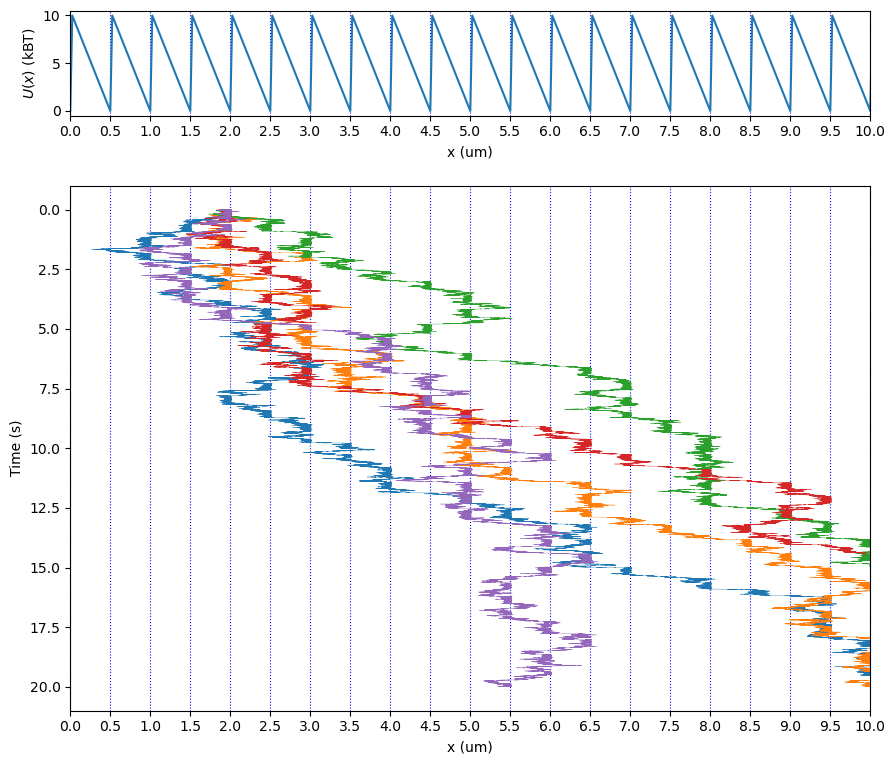

In [225]:
import numpy as np # 計算用ライブラリ
import matplotlib.pyplot as plt  # プロット用ライブラリ

kBT = 4.14E-21  # (J = kg m^2 / s^2)
L = 0.5E-6 # (m)
alpha = 0.05
H = 10*kBT # (kBT)
period = 0.3 # (s)

# パラメータ設定
gamma = 1E-8 # 摩擦係数 (kg/s)
   
T = 20 # (s) 計算時間
dt = 1E-4 # (s) 計算の時間刻み
x0 = 2E-6 # (m) 初期位置．

def U(x):  # のこぎり型ポテンシャル
    xx = x%L
        
    if xx<alpha*L:
        return (H/alpha/L)*xx
    else:
        return H*(1-(xx-alpha*L)/((1-alpha)*L))
    
def dUdx(x):  # のこぎり型ポテンシャルの微分
    xx = x%L   
    
    if xx<alpha*L:
        return H/alpha/L
    else:
        return -H/(1-alpha)/L
    

# メインの関数．ランジュバン方程式をオイラー法で数値積分．
def langevin(dt, T, x0, k, gamma):  # 時間刻み dt で T だけ計算   
    n = int(T / dt)  # ステップ数
    
    w = np.sqrt(2*kBT*dt/gamma)  # ルートの中にdtを入れる
    r = np.random.standard_normal(size = n - 1) # n-1個の正規乱数（平均0, 分散1）を発生．
       
    x = np.zeros(n)
    x[0] = x0 # m/s, 初期位置
    for i in range(n-1):
        if (i*dt) % (2*period) < period:  # periodごとにのこぎり型ポテンシャルとフラット型ポテンシャルを切り替える．
            f = - dUdx(x[i]) # ポテンシャルからうける力
        else:
            f = 0
            
        x[i + 1] = x[i] + dt * f / gamma + w * r[i]
        
    t = np.linspace(0, T - dt, n)
    return t, x

fig = plt.figure(figsize=(8,7), dpi=100)

ax1 = fig.add_axes([0, 0.85, 1, 0.15], xlabel = 'x (um)', ylabel = r'$U(x)$ (kBT)')

ax1.set_xlim([0, 10])
ax1.grid(axis='x',linestyle='dotted', color='b')
ax1.set_xticks(np.linspace(0,10,21))
ax1.grid

# のこぎり型ポテンシャルを表示
x=[]
u=[]
for i in range(22):
    x.append(i*L*1E6)
    u.append(0)
    x.append((i+alpha)*L*1E6)
    u.append(H/kBT)
ax1.plot(x,u)

ax2 = fig.add_axes([0, 0, 1, 0.75], xlabel = 'x (um)', ylabel = 'Time (s)')

# 同じ計算を5回して重ねてプロット．

for i in range(5):
    t, x = langevin(dt, T, x0, k, gamma)  # ランジュバン方程式による計算
    ax2.plot(x *1E6, t, lw = 0.25)  # lwは線の太さ．

    
ax2.grid(axis='x',linestyle='dotted', color='b')
ax2.set_xlim([0, 10])
ax2.set_xticks(np.linspace(0,10,21))
ax2.invert_yaxis()

plt.show()

## [M2] ランダムネス

9.3節参照．

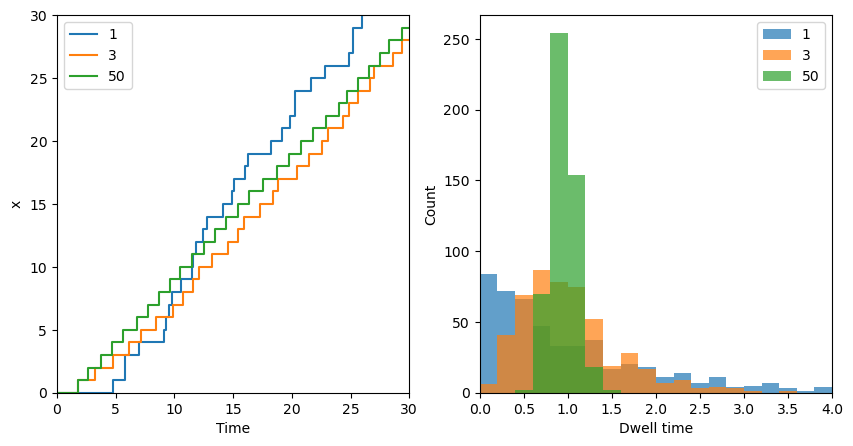

In [39]:
import matplotlib.pyplot as plt
import numpy as np

L = 500         # この距離だけ進んだら修了
tau = 0.001    # 1ステップの時間

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5), dpi = 100)

for n in [1,3,50]:    # nは内部状態の数.大きくすると周期的になる．
    w = 1 # 次の場所に移る遷移率
    p = n*w*tau   # 乱数の閾値

    tlist, xlist, duration = [0], [0], []
    
    t=0
    for x in range(L):
        count = 0  # サイコロを振った回数
        for i in range(n):
            while np.random.random() > p:
                count += 1
        t += count*tau

        duration.append(count*tau)

        tlist.append(t)
        xlist.append(x)        
 
    ax1.step(tlist, xlist, where = 'post', label = n) # トラジェクトリをプロット．
    ax2.hist(duration, range = (0, 4), bins = 20, alpha = 0.7, label = n) # ヒストグラムをプロット．

ax1.set_xlabel('Time')
ax1.set_ylabel('x')
ax1.set_xlim([0, 30])
ax1.set_ylim([0, 30])
ax1.legend()

ax2.set_xlabel('Dwell time')
ax2.set_ylabel('Count')
ax2.set_xlim([0,4])
ax2.legend()

plt.show()

## [M3] アレーニウスの関係式 ボツ?

C:\Users\toyabe\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


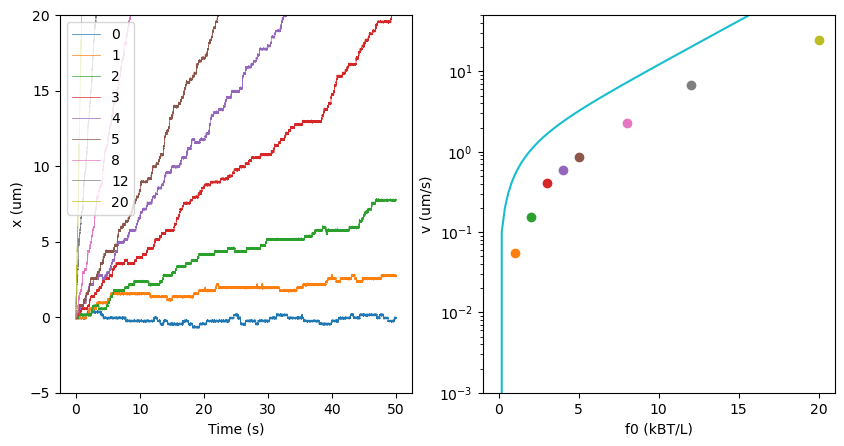

In [232]:
import numpy as np # 計算用ライブラリ
from numpy import cos, sin, pi
import matplotlib.pyplot as plt  # プロット用ライブラリ

kBT = 4.14E-21  # (J = kg m^2 / s^2)
L = 200E-9
a = 3*kBT
    
# メインの関数．ランジュバン方程式をオイラー法で数値積分．
def langevin(dt, T, x0, fex, gamma):  # 時間刻み dt で T だけ計算   
    n = int(T / dt)  # ステップ数
    
    w = np.sqrt(2*kBT*dt/gamma)  # ルートの中にdtを入れる
    r = np.random.standard_normal(size = n - 1) # n-1個の正規乱数（平均0, 分散1）を発生．
       
    x = np.zeros(n)
    x[0] = x0 # m/s, 初期位置
    for i in range(n-1):
        f = - 2*pi*a/L*cos(2*pi*x[i]/L) + fex  # U(x) = a*sin(2*pi*x) - b*x
        x[i + 1] = x[i] + dt * f / gamma + w * r[i]
        
    t = np.linspace(0, T - dt, n)
    return t, x


# パラメータ設定
gamma = 1E-8 # (kg/s)
   
T = 10 # (s) 計算時間
dt = 1E-4 # (s) 計算の時間刻み
x0 = 0 # (m) 初期位置．少し離れたところからスタートして，緩和の様子を見てみる．

# 同じ計算を5回して重ねてプロット．

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5), dpi = 100)
for fex in [0, 1, 2, 3 , 4, 5, 8, 12, 20] :
    t, x = langevin(dt, T, x0, fex * kBT/L, gamma)  # ランジュバン方程式による計算
    v = x[-1] / T

    ax1.plot(t, x *1E6, lw = 0.5, label = fex)  # lwは線の太さ．
    ax2.plot(fex, v*1E6, 'o')
    
ff = np.linspace(0, 20, 100) * kBT/L

d = 0.25*L

vv = np.exp(ff*d/kBT) - np.exp(-ff*d/kBT)  # アレーニウスの式から予想される理論式．
ax2.plot(ff/(kBT/L), vv)
        
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('x (um)')
ax1.set_ylim([-5, 20])
ax1.legend()

ax2.set_xlabel('f0 (kBT/L)')
ax2.set_ylabel('v (um/s)')
ax2.set_ylim([0.001, 50])
plt.yscale('log')

plt.show()

# 細胞

## [C1] 相分離

- L*LのセルにN個の粒子を置く．
- 各粒子をランダムに上下左右に動かす．ただし，上下左右の粒子の数×E のエネルギーを持つとして，局所詳細つり合いを守るような遷移率で動かす．周期境界条件である．
- 計算にはGillespieアルゴリズム（たとえば，金子，澤井，高木，古澤「細胞の理論生物学」（東大出版，2020年）が詳しい）を使用．
- 粒子数 N を変えると，振る舞いが変わる．Nが少ないときや多いときはドロップレット状のパターンが生じ，中間ぐらい（N = L*L/2）では共連結型（スプノーダル分解）となる．
13.5節参照．

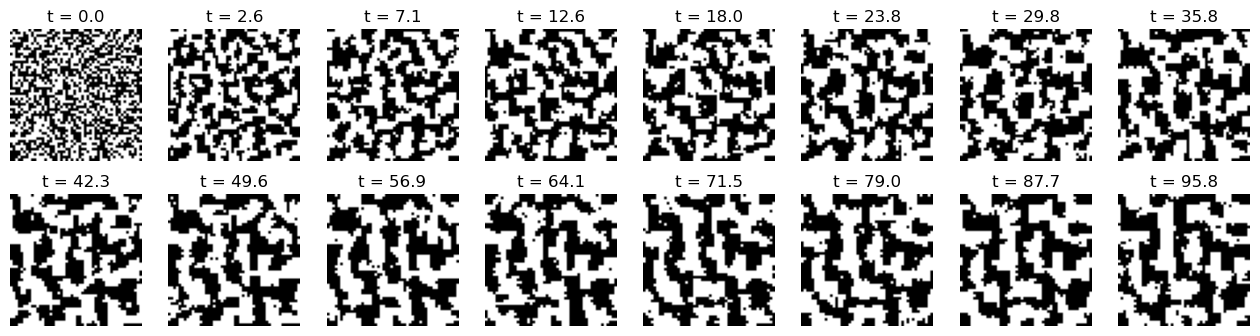

In [183]:
import numpy as np # 計算用ライブラリ
import matplotlib.pyplot as plt  # プロット用ライブラリ
    
L = 50 # 全体の大きさ（1辺の長さ）
N = 1250  # 粒子密度（0 - 1）
stepN = 80000 # 計算ステップ数

E = -2  # 粒子同士の相互作用 (kbT)．周囲に1つも粒子がいないときに比べて，3つの粒子と接すると 3E だけ安定．
w0 = np.exp(-0.5*E*np.array([0, 1, 2, 3, -3, -2, -1])) # 局所詳細つり合い関係を満たすために0.5倍する．

mx = [1, 0, -1, 0]
my = [0, 1, 0, -1]


# 初期配置
def init():
    k = np.random.choice(L*L, N, replace = False) # 重複なしに， L * Lのマス目の中からN 個を選ぶ．
    x = k // L
    y = k % L

    s = np.full((L, L), -1, dtype = np.int) # 状態．粒子がいない場所は-1．いる場所は粒子の番号．
    for i in range(N):
        s[x[i], y[i]] = i
     
    return x, y, s

# (px, py)の周りにある粒子数（0 - 4）を数える
def count(px, py, s):
    c = 0
    for m in range(4):
        if s[(px + mx[m])%L, (py + my[m])%L]>=0:
            c += 1
    return c

# 反応のリストを作る
def wlist(x, y, s):
    w = np.full((N, 4), 1) # 遷移率
    for i in range(N):
        w = updatewlist(i, x, y, s, w)
    return w

# 特定の粒子に関する遷移率をアップデート
def updatewlist(i, x, y, s, w):
    for m in range(4):
        nextx = (x[i] + mx[m])%L
        nexty = (y[i] + my[m])%L

        if s[nextx, nexty] >=0:
            w[i, m] = 0
        else:
            d = count(nextx, nexty, s) - count(x[i], y[i], s) # 遷移によって，隣り合う粒子の数が何個増えるか．
            w[i, m] = w0[d]

    return w

    
# メインルーチン

t = 0 # 時間 （単位は適当）

x, y, s = init() # 粒子配置の初期化

w = wlist(x, y, s) # 反応のリストを作る． w[n, m]は，n番目の粒子の m 番目の動き（右，上，左，下のどれ？）に対応する遷移率．

fig, ax = plt.subplots(ncols=8, nrows = 2, figsize=(16, 4), dpi = 100)

for i in range(stepN):    
    wsum = np.sum(w)
    wcum = np.cumsum(w / wsum) # 規格化したw の累積和 ．wsumは1次元配列（4N個の要素）．   

    # （ソート済みの）の）リスト wsum の中から，最初に r を超えるインデックスを探す．ただし， wsum は 4N個の1次元リストになっているので，粒子番号と動きの番号に変換する．
    r = np.random.rand()  
    k = np.argmax(wcum>r)
    p = k // 4 # 動かす粒子の番号
    m = k % 4 # 動かし方

    s[x[p], y[p]] = -1
    
    x0 = x[p]
    y0 = y[p]
    
    x[p] = (x[p] + mx[m])%L
    y[p] = (y[p] + my[m])%L
    s[x[p], y[p]] = p

    # 粒子の周辺にいる粒子に関係する遷移率をアップデート．2重カウントしているところもある．
    w = updatewlist(p, x, y, s, w)
    for mm in range(4):
        q = s[(x0+mx[mm])%L, (y0+my[mm])%L]
        if q>=0:
            w = updatewlist(q, x, y, s, w)  
            
    for mm in range(4):
        q = s[(x[p]+mx[mm])%L, (y[p]+my[mm])%L]
        if q>=0:
            w = updatewlist(q, x, y, s, w)  

    tau = -np.log(np.random.rand())/wsum # 反応にかかる時間
    t += tau # 時間を更新
    
    # 定期的にプロット
    if i % (stepN // 16) == 0:
        pl = i // (stepN // 16)
        a = ax[pl // 8, pl%8] 
        a.set_title('t = {:.1f}'.format(t))       
        a.imshow(s>=0, cmap='gray')
        a.axis('off')
   
plt.show()

# 集団運動

## [S1] ビチェックモデル

14.4節参照．

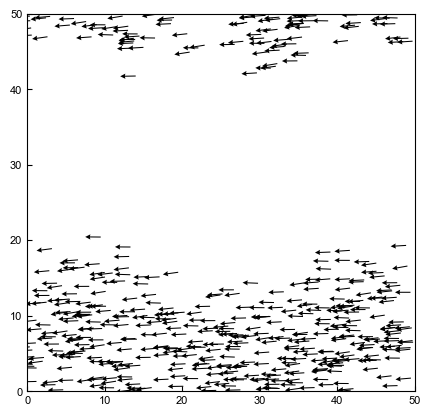

In [227]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, sin, arctan2, random, zeros, pi

v, dt, r, noise = 1, 1, 7, 0.2

N = 500 # 粒子の数
L = 50 # 領域の大きさ

# 初期値
x = random.rand(N)*L
y = random.rand(N)*L
theta = random.rand(N)*2*pi

# 繰り返し
stepN = 100
for i in range(stepN):    
    c = zeros(N)
    s = zeros(N)
    for k in range(N):       
        dx = x[k] - x
        dy = y[k] - y        
        
        dx = (dx + L/2)%L - L/2
        dy = (dy + L/2)%L - L/2
            
        f = dx*dx + dy*dy < r*r
        c[k] = sum(f * cos(theta))
        s[k] = sum(f * sin(theta))

    theta = arctan2(s, c) + (random.rand(N)-0.5)*noise
    
    x = (x + dt*v*cos(theta)) % L
    y = (y + dt*v*sin(theta)) % L
    
plt.figure(figsize=(5,5), dpi = 100)
plt.xlim(0, L)
plt.ylim(0, L)

plt.quiver(x, y, cos(theta), sin(theta), scale = 25, headwidth = 5) # プロット

plt.show()

In [164]:
k = np.random.choice(L*L, N, replace = False)
x = k // L
y = k % L

TypeError: only size-1 arrays can be converted to Python scalars

In [168]:
k//L

array([12, 21,  5, 14, 38, 36,  5, 32, 12, 33, 16, 30, 31, 29,  8, 23, 36,
        0,  9, 24, 38, 11, 14, 28,  6, 21, 35, 38, 18, 18, 32, 22,  2, 35,
       25, 19, 16, 25, 23, 15, 30, 13, 20, 13, 32, 37,  6,  0,  8,  5, 39,
        1, 16, 17,  2, 19,  9, 39,  5, 23, 31, 13, 14, 33, 27, 31, 30, 35,
       11, 15, 29, 33, 26, 11,  0, 18, 38,  6, 16, 20, 13, 28, 19, 24,  3,
       14, 35, 23, 32, 12, 14, 17, 17, 27, 28, 16,  9, 10, 34,  8, 23,  8,
        9,  2, 31, 21, 20, 15, 21,  9, 26, 32, 10, 30, 37,  4, 22, 14, 26,
       37, 34, 27, 17, 31, 17, 21, 35,  1, 24,  9,  8,  1, 32, 20, 33,  5,
       21,  1, 18, 32, 25, 19, 29, 39, 32, 33, 36,  3, 29, 30,  0, 32, 27,
        1, 14, 33,  4,  4,  6, 28, 32,  4, 13, 11, 33, 20, 29, 38, 17, 38,
       39,  9, 27, 32, 18, 34, 35, 34,  1, 36, 30, 21, 37,  9, 11,  3, 31,
        8, 29, 30, 23, 19, 22, 18, 19, 21, 29, 25, 17, 19, 36, 27, 17, 36,
        2, 19,  8,  9, 27, 15, 12,  6,  7,  4, 21, 15, 32, 19, 22,  0, 29,
       19, 38,  0, 32, 35